In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import exp
import random

# PROBLEM 4 Advanced and optional exercise: Reinforcement learning in a maze.

In [146]:
#%% defining plot function
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 11#7.
sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark')

# (a)

In [61]:
p_right = 0.5
p_left = 0.5
H = {'s': 'h','v':0}
D = {'s': 'd','v':0}
E = {'s': 'e','v':5}
F = {'s': 'f','v':2} 
G = {'s': 'g','v':0}
B = {'s': 'b','v': p_right* D['v'] + p_left*E['v']}
C = {'s': 'c','v': p_right* G['v'] + p_left*F['v']}
A = {'s': 'a','v': p_right* B['v'] + p_left*C['v']}

[{'s': 'a', 'v': 1.75}, {'s': 'c', 'v': 1.0}]

In [6]:
def maze(trials):
    states = {'A': 0,
             'B': 0,
             'C': 0,
             'D': 0,
             'E': 0,
             'F': 0,
             'G': 0,
             'H': 0}
    rewards = {'A': [],
             'B': [],
             'C': [],
             'D': [],
             'E': [],
             'F': [],
             'G': [],
             'H': []}
    for i in range(trials):
        
        s1 = 'A'
        states['A'] += 1
        s2 = random.choice(['B','C'])
        s3_choice = random.choice(['left','right'])
        if s2 == 'B' and s3_choice  == 'left':
            states['B'] += 1 
            s3 = 'D'
            states['D'] += 1
            #rewards
            r = 0
            rewards['A'].append(r)
            rewards['B'].append(r)
            rewards['D'].append(r)
            rewards['H'].append(r)
        elif s2 == 'B' and s3_choice == 'right':
            states['B'] += 1 
            s3 = 'E'
            states['E'] += 1 
            #rewards
            r = 5
            rewards['A'].append(r)
            rewards['B'].append(r)
            rewards['E'].append(r)
            rewards['H'].append(r)
        elif s2 == 'C' and s3_choice == 'left':
            states['C'] += 1 
            s3 = 'F'
            states['F'] += 1 
            #rewards
            r = 2
            rewards['A'].append(r)
            rewards['C'].append(r)
            rewards['F'].append(r)
            rewards['H'].append(r)
 
        elif s2 == 'C' and s3_choice == 'right':
            states['C'] += 1 
            s3 = 'G' 
            states['G'] += 1 
            #rewards
            r = 0
            rewards['A'].append(r)
            rewards['B'].append(r)
            rewards['E'].append(r)
            rewards['H'].append(r)
 
        s4 = 'H'
        states['H'] += 1
        
        
        
    return states, rewards

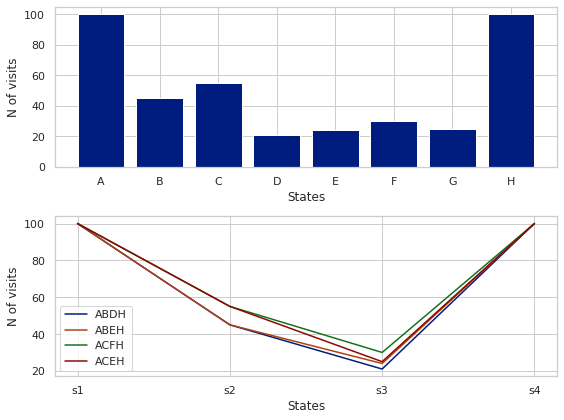

In [12]:
states, rewards = maze(100)

fig, (ax1, ax2) = plt.subplots(2)
ax1.bar(list(states.keys()), list(states.values()))
#print('The average rewards: {}'.format(np.mean(rewards)))
ax1.set_xlabel('States')
ax1.set_ylabel('N of visits')

m1 = {'s1': states['A'], 's2': states['B'], 's3': states['D'], 's4': states['H']}
m2 = {'s1': states['A'], 's2': states['B'], 's3': states['E'], 's4': states['H']}
m3 = {'s1': states['A'], 's2': states['C'], 's3': states['F'], 's4': states['H']}
m4 = {'s1': states['A'], 's2': states['C'], 's3': states['G'], 's4': states['H']}

ax2.plot(list(m1.keys()), list(m1.values()))
ax2.plot(list(m2.keys()), list(m2.values()))
ax2.plot(list(m3.keys()), list(m3.values()))
ax2.plot(list(m4.keys()), list(m4.values()))
ax2.legend(['ABDH','ABEH','ACFH', 'ACEH'])
ax2.set_xlabel('States')
ax2.set_ylabel('N of visits')
plt.savefig('fig14_report2.png', dpi=600)
plt.show()

It was impossible to continue from the previous function, so I restart it. But keep the first one because I already made the necessary plots.

# (b)

In [147]:
def l_2_n(s):
    states = {'A': 0,
             'B': 1,
             'C': 2,
             'D': 3,
             'E': 4,
             'F': 5,
             'G': 6,
             'H': 7}
    s2 = [[states[v] for v in i] for i in s]
    
    return s2

In [148]:
def maze2(trials):
    s1 = 'A'
    s2 = ['B', 'C']
    s3b = ['D', 'E']
    s3c = ['F', 'G']
    s4 = 'H'
    ra = 0
    rb = 0
    rc = 0
    rd = 0
    re = 5
    rf = 2
    rg = 0
    rh = 0
    
    states = []
    rewards = []
    for i in range(trials):
        trial_states = []
        trial_rewards = []
        
        #state 1
        trial_states.append(s1)
        trial_rewards.append(ra)
        
        #state 2
        choice_s2 = random.choice(s2)
        trial_states.append(choice_s2)
        if choice_s2 == 'B':
            trial_rewards.append(rb)
            
            #state 3 B
            choice_s3 = random.choice(s3b)
            trial_states.append(choice_s3)
            if choice_s3 == 'D':
                trial_rewards.append(rd)
            else:
                trial_rewards.append(re)
        
        else:
            trial_rewards.append(rc)
            
            #state 3 C
            choice_s3 = random.choice(s3c)
            trial_states.append(choice_s3)
            if choice_s3 == 'F':
                trial_rewards.append(rf)
            else:
                trial_rewards.append(rg)
        
        #state 4
        trial_states.append(s4)
        trial_rewards.append(rh)
        
        #add to the total of trials
        states.append(trial_states)
        rewards.append(trial_rewards)
        
    return states, rewards

In [149]:
s, r = maze2(100)

In [150]:
def td_learning(s, r, e = 0.2):
    s = l_2_n(s)
    v_total = np.zeros(8)
    v = np.zeros(8) # one for each possible state
    for trial in range(len(s)):
        t_s = s[trial]
        t_r = r[trial]
        for state in range(len(t_s)-1):        
            v[t_s[state]] +=  e*(t_r[state] + v[t_s[state + 1]] - v[t_s[state]])
        v_total = np.vstack((v_total, v))
    return v_total

In [151]:
 v_total = td_learning(s, r, e = 0.2)

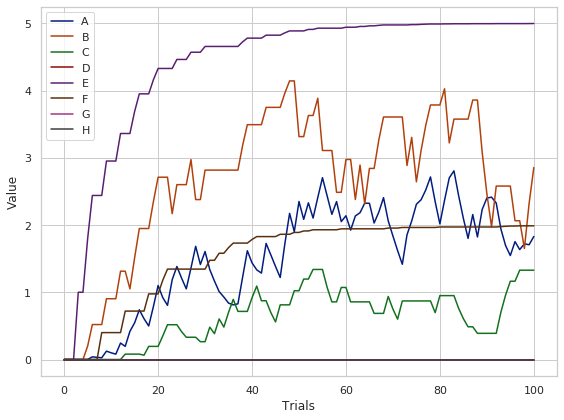

In [153]:
plt.plot(v_total)
plt.legend(['A', 'B','C','D','E','F','G','H'])
plt.xlabel('Trials')
plt.ylabel('Value')
plt.savefig('fig15_report2.png', dpi=600)
plt.show()

# (c)

In [281]:
def softmax( v_l, v_r, beta):
    p_r = 1/(1+ exp(beta*(v_l - v_r)))
    random = np.random.rand()
    if p_r > random:
        return 'right'
    elif p_r <= random:
        return 'left'
#     else:
#         return random.choice(['left', 'right'])

In [239]:
def td_learning2(v_s1, v_s2, r1 ,e = 0.2):
    v_s1 +=  e*(r1 + v_s2 - v_s1)
    return v_s1

In [282]:
def smart_rat(trials, beta = 0.5):
    ra = 0
    rb = 0
    rc = 0
    rd = 0
    re = 5
    rf = 2
    rg = 0
    rh = 0
    
    states = []
    rewards = []
    v = np.zeros(8)
    v_total = np.zeros(8)
    
    for i in range(trials):
        trial_states = []
        trial_rewards = []
        
        #state 1
        trial_states.append(0)
        trial_rewards.append(ra)
        
        choice_s2 = softmax(v[1], v[2], beta)
        
        
        #state 2
        if choice_s2 == 'left':
            v[0] = td_learning2(v[0], v[1], ra, e)
            trial_states.append(1)
            trial_rewards.append(rb)
            
            #state 3 B
            choice_s3 = softmax(v[3], v[4], beta)
            
            if choice_s3 == 'left':
                v[1] = td_learning2(v[1], v[3], rb, e)
                trial_states.append(3)
                trial_rewards.append(rb)
                trial_rewards.append(rd)
                v[3] = td_learning2(v[3], v[7], rd, e)
            elif choice_s3 == 'right':
                v[1] = td_learning2(v[1], v[4], rb, e)
                trial_states.append(4)
                trial_rewards.append(rb)
                trial_rewards.append(re)
                v[4] = td_learning2(v[4], v[7], re, e)
        
        elif choice_s2 == 'right':
            v[0] = td_learning2(v[0], v[2], ra, e)
            trial_states.append(2)
            trial_rewards.append(rc)
            
            #state 3 B
            choice_s3 = softmax(v[3], v[4], beta)
            
            if choice_s3 == 'left':
                v[2] = td_learning2(v[2], v[5], rc, e)
                trial_states.append(5)
                trial_rewards.append(rc)
                trial_rewards.append(rf)
                v[5] = td_learning2(v[5], v[7], rf, e)
            elif choice_s3 == 'right':
                v[2] = td_learning2(v[2], v[6], rc, e)
                trial_states.append(6)
                trial_rewards.append(rc)
                trial_rewards.append(rg)
                v[6] = td_learning2(v[6], v[7], rg, e)
        
        #state 4
        trial_states.append(7)
        trial_rewards.append(rh)
        
        #add to the total of trials
        states.append(trial_states)
        rewards.append(trial_rewards)
        v_total = np.vstack((v_total, v))
        
    return states, rewards, v_total

In [292]:
s, r, v = smart_rat(100, 0.1)
s2, r2, v2 = smart_rat(100, 1)

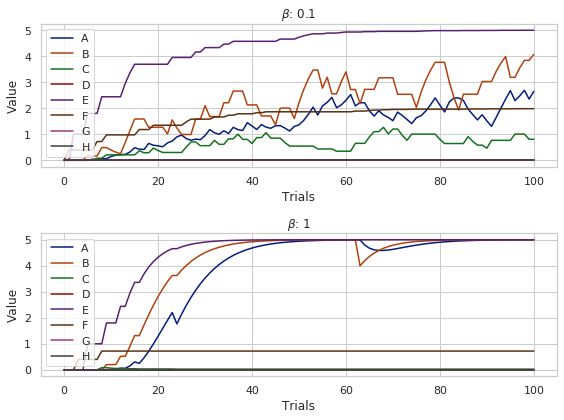

In [296]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(v)
ax1.legend(['A', 'B','C','D','E','F','G','H'])
ax1.set_xlabel('Trials')
ax1.set_ylabel('Value')
ax1.set_title(r'$\beta$: 0.1')
ax2.plot(v2)
ax2.legend(['A', 'B','C','D','E','F','G','H'])
ax2.set_xlabel('Trials')
ax2.set_ylabel('Value')
ax2.set_title(r'$\beta$: 1')
plt.savefig('fig16_report2.png', dpi=600)
plt.show()